In [3]:
import os

from fastai.data.external import download_url
from fastai.data.transforms import get_image_files
from fastai.vision.utils import download_images

from fastbook import search_images_bing

In [4]:
from pathlib import Path

In [5]:
p = Path()

In [6]:
from fastai.vision.utils import verify_images

# Gathering Data

## download data from bing

At this step, use bing search engine to search for training data. 

In [7]:
key = os.environ.get("AZURE_SEARCH_KEY", "cf157b2d98044361a491e9039a93d873")

In [8]:
results = search_images_bing(
    key, term="张雨绮", max_images=10
)  # each search results are returned in dictionary
ims = results.attrgot("contentUrl")  #

In [30]:
path = Path(p / "names")
path.mkdir(exist_ok=True)

names = "张馨予","张雨绮","张馨月","张歆艺"
for name in names:
    dest = path / name
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f"{name}", max_images=5)
    download_images(dest, urls=results.attrgot("contentUrl"))

fns = get_image_files(path)

In [10]:
failed = verify_images(fns)
failed

(#0) []

In [11]:
# delete the not supported files from the directory
try:
    failed.map(Path.unlink)
except:
    pass

## prepare data for training

In [17]:
from fastai import data, vision

In [13]:
bears = data.block.DataBlock(
    blocks=(vision.ImageBlock, data.block.CategoryBlock),  # (independent variable, dependent variable)
    get_items=data.transforms.get_image_files, # read data recursively
    splitter=data.transforms.RandomSplitter(valid_pct=0.2, seed=43), # random split into training and validation sets
    get_y=data.transforms.parent_label, # get the names of the parent folder, use it as 'y-value'
    item_tfms=vision.augment.Resize(128) # a tensor requires the input to be of the same size, therefore i included here a resize funtion to scale the image
)

In [14]:
dls = bears.dataloaders(path)

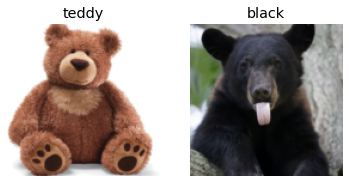

In [15]:
dls.valid.show_batch(max_n=2)

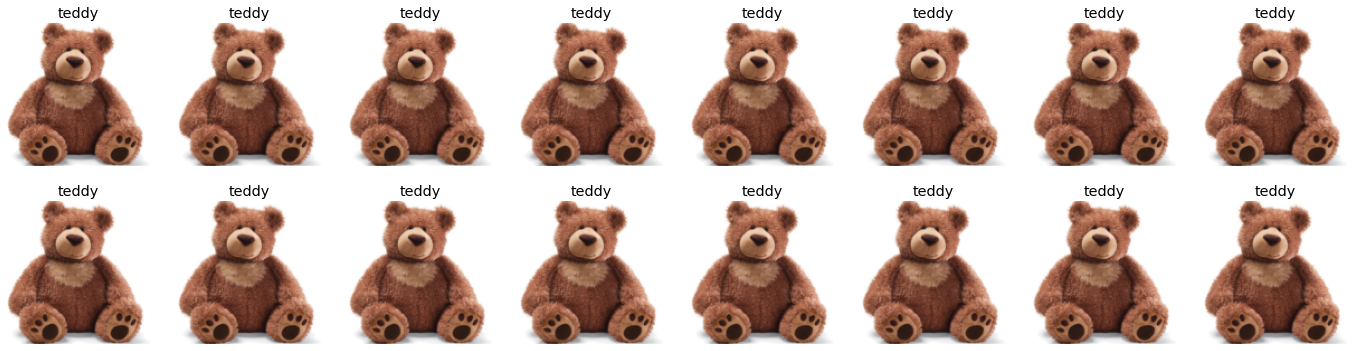

In [26]:
# notes: transform the data to capture possible variations (data augmentation)
bears = bears.new(item_tfms=vision.augment.Resize(128), batch_tfms=vision.augment.aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n= 16, nrows=2, unique=True)